$\newcommand{\bmx}{\large \boldsymbol{x} \normalsize}$
$\newcommand{\bmc}{\large \boldsymbol{c} \normalsize}$
$\newcommand{\bmy}{\large \boldsymbol{y} \normalsize}$
$\newcommand{\bmb}{\large \boldsymbol{b} \normalsize}$
$\newcommand{\bmw}{\large \boldsymbol{w} \normalsize}$
$\newcommand{\bme}{\large \boldsymbol{e} \normalsize}$
$\newcommand{\bmu}{\large \boldsymbol{u} \normalsize}$


Llevamos todas estas ecuaciones a una forma **matricial**


$$
\begin{pmatrix}
w_{1 j+1} \\
w_{2 j+1} \\
\vdots \\
w_{n-2 j+1} \\
w_{n-1 j+1}
\end{pmatrix}
=
\begin{pmatrix}
1 -2 \gamma & \gamma & 0 & \cdots & 0  \\
\gamma & 1 - 2 \gamma & \gamma & \ddots & \vdots  \\
0 & \ddots & \ddots & \ddots & 0  \\
\vdots & \ddots & \gamma & 1 - 2 \gamma & \gamma \\
0 & \cdots & 0 & \gamma & 1 - 2 \gamma
\end{pmatrix}
\begin{pmatrix}
w_{1j} \\
w_{2j} \\
\vdots \\
w_{n-2 j}  \\
w_{n-1 j}  \\
\end{pmatrix}
+ \gamma
\begin{pmatrix}
w_{0j} \\ 0  \\ \vdots \\ 0 \\ w_{nj}
\end{pmatrix}
$$

Esto se puede escribir de forma vectorial/matricial como

$$\bmw_{j+1} = A \bmw_j + \bmc \tag{9} $$
donde

$$
A =
\begin{pmatrix}
1 -2 \gamma & \gamma & 0 & \cdots & 0  \\
\gamma & 1 - 2 \gamma & \gamma & \ddots & \vdots  \\
0 & \ddots & \ddots & \ddots & 0  \\
\vdots & \ddots & \gamma & 1 - 2 \gamma & \gamma \\
0 & \cdots & 0 & \gamma & 1 - 2 \gamma
\end{pmatrix}
$$
donde
$$ \bmc =
\gamma \begin{pmatrix}
w_{0j} \\ 0  \\ \vdots \\ 0 \\ w_{nj}
\end{pmatrix} $$
y $\bmw_{j+1}$ es el vector de salida
y $\bmw_{j}$ es el vector de entrada.


# Empalme con la clase anterior.

## Analisis de estabilidad.
### Metodo matricial
El sistema (9) es iterativo pero necesitamos saber si converge o no. La convergencia de (9) esta supediata al radio espectral de $A$ es decir queremos que $\rho(A) < 1$.

Para este analisis pensemos en los siguientes criteriors.

* Si la solucion fuera analitica no habria error. Pero la solucion es  numerica.

* Los datos en la practica son adquiridos con instrumentacion la cual trae errores de intrumentacion.

* El sistema numerico tambien es impreciso y los errores se propagan.

Definamos el error inicial como

$$\bme_0 = \bmu_0 - \bmw_0  $$
$$\bmw_0 = \bmu_0 - \bme_0  \tag{10} $$
La pregunta es como se propaga este error?
Veamos (de la ecuacion (9) y la (10) )

\begin{eqnarray}
\bmw_1  &=& A \bmw_0 + \bmc = A \bmu_0 - A \bme_0 + \bmc \\
 \bmw_2 &=& A^2 \bmu_0 - A^2 \bme_0 + A \bmc + \bmc  \\
 &\vdots& \\
 \bmw_{j+1} &=& A^{j+1} \bmu_0 - A^{j+1} \bme_0 +
 \sum_{i=0}^j A^i \bmc
\end{eqnarray}
La solucion exacta al comienzo es $\bmu_0$ se propaga hasta
$$A^{j+1} \bmu_0 + \sum_{i=0}^j A^i \bmc $$

La magnitud del termino que me genera el error en este proceso es


$$ \| A^{j+1} \bme_0 \|  $$

Para  el error no crezca queremos que

$$ \| A^{j+1} \bme_0 \|  \le \| \bme_0 \|  $$, despues de algun $j \gg 1$.

Ahora bien, de la norma de matrices

$$\| A^{j+1} \bme_0 \|  \le \| A^j  \| \| \bme_0 \| $$
Dos puntos

1. $\| \bme_0 \|$ no cambia. Es una constante de como los datos ya vienen con ruido.

2. Quremos que $\lim_{j \to \infty} \| A^j \| = 0$.
Es decir, queremos que $\rho(A) < 1$.  (esto es suficiente y se explico en la primera parte del curso.)


Segun el apendice C de las notas de clase. Los autovalores de $A$ estan dados por


$$\lambda_j = a - 2 \sqrt{bc} \cos \frac{j \pi}{n+1} \quad , \quad j  =1,2, \cdots, n $$
Ver formula C-15 del apendice C.
En este caso particular

 * $a=1 - 2 \gamma$ (  diagonal principal)
 * $b=c=\gamma$ (sub y super diagonales).

 De forma que

 $$\lambda_j = (1 - 2 \gamma) - 2 \gamma \frac{j \pi}{n+1}= 1 - 2 \gamma \left (  1 + \cos \frac{j \pi}{n+1}  \right ) = 1 - 4 \gamma \cos^2 \frac{j \pi}{2 ( n+1)} \quad , j=1,2, \cdots, n. $$

$\cos x = \cos 2 ( x/2) = \cos^2 (x/2) - \sin^2(x/2) = \cos^2(x/2) - 1 + \cos^2(x/2) = 2 \cos^2 (x/2) - 1 $

$\cos x = \cos 2 ( x/2) = \cos^2 (x/2) - \sin^2(x/2) = 1- \sin^2(x/2) - \sin^2(x/2) = 1 - 2 \sin^2 (x/2) $$

Queremos $| \lambda_j | < 1$, entonces

$$\left |  1 - 4 \gamma \cos^2 \frac{j \pi}{2(n+1)}  \right | < 1  \tag{0} $$
Como $| x | = | -x|$
y

$$ | x | < a  \Leftrightarrow -a < x < a $$

$$-1  <  4 \gamma \cos^2 \frac{j \pi }{2(n+1)} - 1 < 1  $$
Sumamos 1 en todas partes
$$0  <  4 \gamma \cos^2 \frac{j \pi }{2(n+1)}  < 2  $$

Simplificamos por 2 y ignoramos la primera desiguanl

$$\gamma \cos^2 \frac{j \pi }{2 ( n + 1)} < \frac12 $$
Recuerden que $\gamma >0$,
En el peor de los casos (el maximo) $\cos^2 u=1$

Entonces

$$\gamma < \frac12. $$
Quien es $\gamma$?
$\gamma = \alpha k / h^2$
donde  vamos a usar la siguiente notacion


Como

$$ \gamma = \frac{\alpha k}{h^2} $$
$$ \gamma < \frac12 $$

$$  \frac{\alpha k}{h^2} < \frac12$$
Despejando $k$ tenemos

$$ k <  \frac{h^2}{2 \alpha} $$


En terminos de la siguiente notacion tenemos
$$dx =h \quad , \quad \text{tamano de muestra en espacio.}$$
$$dt =k \quad , \quad \text{tamano de muestra en tiempo.}$$
$$nx =k \quad , \quad \text{numero de muestras en espacio.}$$
$$nt=t \quad , \quad \text{numero de muestras en tiempo.}$$

$$dt < \frac{ dx^2}{2 \alpha} $$

### Metodo de Von Neumann.
La idea de Von Neumann se basa en la representacion de la solucion de calor como series de Fourier. Esto se estudia en el curso de Ecuaciones Diferenciales Parciales.  

Aca el error lo vamos considerar diferente.

$$e_{ij} = w_{ij} - W_{ij} $$
$W_{ij}$ es la solucion del sistema (2.1) de la clase anterior.

$$w_{i j+1} = (1 - 2 \gamma) w_{ij} + \gamma( w_{i+1 j} - w_{i-1 j}) $$

La solucion con error $W_{ij+1}$ tambien cumple el esquema
de diferencias finitas.
$$W_{i j+1} = (1 - 2 \gamma) W_{ij} + \gamma( W_{i+1 j} - W_{i-1 j}) \tag{1} $$
pero con error.

Entonces como $w_{ij} = e_{ij} + W_{ij}$

$$e_{i j+1} + W_{i j+1} = (1 - 2 \gamma) (e_{i j} + W_{ij})  + \gamma( e_{i+1 j} + W_{i+1 j} - e_{i-1 j} + W_{i-1 j}) \tag{2} $$




Restemos (2)- (1)

$$e_{i j+1} = (1 - 2 \gamma)e_{ij} + \gamma( e_{i+1 j} - e_{i-1 j} ) \tag{3} $$

La idea de John Von Neumann es pensar que como las series de Fourier que resuelven la ecuacion de calor son

$$ u_m(x,t) = K \mathrm{e}^{\alpha t} \mathrm{e}^{\mathrm{i} x_m x} $$
donde $\mathrm{i}  = \sqrt{-1}$.

Nota: Antes de seguir es bueno saber que

$$\mathrm{e}^{\mathrm{i} \theta} = \cos \theta + \mathrm{i} \sin \theta $$
Si $\theta=\pi$

$$\mathrm{e}^{\mathrm{i} \pi } = -1 + 0 $$

$$\mathrm{e}^{\mathrm{i} \pi } + 1= 0 $$

Cerramos la nota.

El error $e_{ij} = K \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_i}$, se reemplaza en la ecuacion (3).

$$K \mathrm{e}^{\alpha t_{j+1}} \mathrm{e}^{\mathrm{i} k x_i} = (1 - 2 \gamma) \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_i} + \gamma ( \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_{i+1}} + \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_{i-1}}) $$

Vamos a simplificar esta ecuacion.

Dividimos la ecuacion anterior por $$K \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_i}  $$


$$K \mathrm{e}^{\alpha \Delta t}  = (1 - 2 \gamma) + \gamma ( \mathrm{e}^{\mathrm{i} k \Delta x } + \mathrm{e}^{\mathrm-{i} k \Delta x} ) $$



De
$$e^{\mathrm{i} \theta} = \cos \theta + \mathrm{i} \sin \theta$$
$$e^{-\mathrm{i} \theta} = \cos \theta - \mathrm{i} \sin \theta$$

$$\cos \theta = \frac{\mathrm{e}^{\mathrm{i} \theta } + \mathrm{e}^{- \mathrm{i} \theta}}{2} $$

$$\sin \theta = \frac{\mathrm{e}^{\mathrm{i} \theta } - \mathrm{e}^{- \mathrm{i} \theta}}{2 \mathrm{i} } $$

Veamos

\begin{eqnarray}
 \mathrm{e}^{\mathrm{i} \Delta t} &=& (1 - 2 \gamma) + \gamma( \mathrm{e}^{\mathrm{i} k \Delta x} + \mathrm{e}^{-\mathrm{i} k \Delta x})  \\
&=& (1 - 2 \gamma) + 2 \gamma  \cos k \Delta x) \\
&=& 1 - 2 \gamma ( 1 - \cos k \Delta x) \\
&=& 1 - 2 \gamma ( 1 - 1 - 2 \sin^2 \frac{k \Delta x}{2}) \\
&=& 1 - 4 \gamma \left ( \sin^2 \frac{k \Delta x}{2} \right )
\end{eqnarray}

Definamos el **factor de amplificacion**: Este se define como el tamano (valor absoluto) de la iteracion (error) en el tiempo $t_{j+1}$ por el tamanho de  iteracion en el tiempo $t_j$.

$$G = \frac{K e_{i j+1}}{K e_{ij}} = \frac{\mathrm{e}^{\alpha t_{j+1}} \mathrm{e}^{\mathrm{i} k x_i}}{\mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_i}} = \mathrm{e}^{\alpha \Delta t}$$

Necesitamos que el factor de amplificacion sea $\le 1$.

$$\left | 1 - 4 \gamma \left ( \sin^2 \frac{k \Delta x}{2}  \right )  \right | \le 1 $$

Recuerriendo a las deisgualdades de valor absoluto de arriba (Ecuacion (0)) encontramos que

$$ 4 \gamma \left ( \sin^2 \frac{k \Delta x}{2}  \right ) \le 2 $$

De donde (asumiento que $\sin^2 (U)$ pueda llegar a tomar el valor $1$ , cuando $k \Delta x \to \pi$. Necesitamos que

$$\gamma \le \frac12 $$

Existen otros metodos de evaluacion de estabilidad de un sistema de diferencias finitas. Por ejemplo:o

* Lax Equivalence.
* Analisis de error de energia.

y otros.

En la segunda parte de la clase vemos un ejemplo

**Ejemplo 2.3.1**: Se puede comprobar que la solucion analitica de la ecuacion diferencial de calor

$$
\begin{cases}
\frac{\partial u}{\partial t} - \alpha \frac{\partial^2 u}{\partial x^2} = 0 \quad , \quad \text{ecuacion diferencial} \\
u(x,0) = f(x)  \quad , \quad \text{condicion inicial} \\
u(0, t) = 0 \quad , \quad u(L,t) =  0 \quad , \quad \text{condiciones de frontera} \\
f(x) = 6 \sin \left (  \frac{\pi x}{L} \right )
\end{cases}
$$
en el intervalo $[0, L]$ es

$$u(x,t) = 6 \sin \left ( \frac{\pi x}{L} \right ) \mathrm{e}^{- \frac{1}{\alpha} \left ( \frac{\pi}{L} \right )^2 } $$

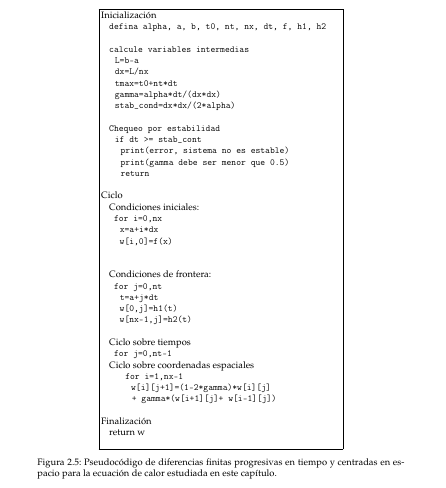

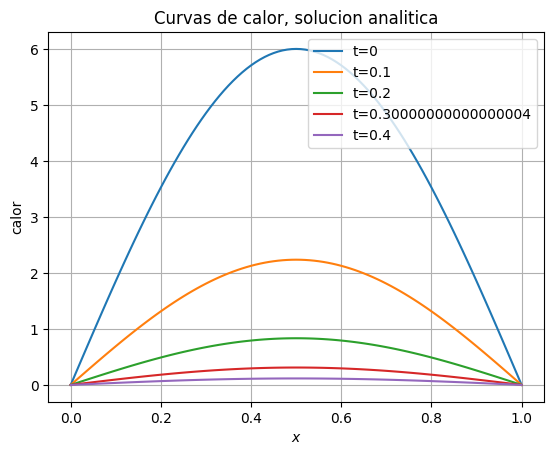

In [2]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 1
a=0
b=1
nx=101
X = np.linspace(a,b,nx)
L= b-a

def u(x,t):
    return 6*np.sin(np.pi*x/L)*np.exp(-(1/alpha)*(np.pi/L)**2*t)

t0=0
dt=0.1
t=t0

params = {'legend.fontsize':5, 'legend.handlength':1}

plt.xlabel(r"$x$")
plt.ylabel("calor")
plt.title("Curvas de calor, solucion analitica")

nplots=5
for i in range(nplots):
    plt.plot(X, u(X,t), label='t='+str(t))
    plt.legend(labelspacing=1, title='tiempo')
    t+=dt
plt.legend()
plt.grid(True)
plt.show()

## Solucion numerica

In [6]:
def solu_eq_calor(alpha, a, b, t0, nt, nx, dt, f):
    '''
    Calcula la solucion numerica de la ecuacion de calor
    alpha: constante de propagacion de calor
    a : bordo izquierdo
    b : bordo derecho
    t0: tiempo inicial
    nt: numero de muestras en tiempo
    nx : numero de muestras en espacio
    dt : paso de tiempo
    f : funcion de frontera
    '''

    L=b-a
    dx = L/(nx-1)
    gamma = alpha*dt/(dx**2)
    stab_cond = dx**2/(2* alpha)

    # verificar estabilidad
    if dt >= stab_cond:
        print("error: la condicion de estabilidad fue violada")
        print(f" dt={dt}")
        print(f" debe ser menor que dx**2/(2*alpha) = {stab_cond} ")
        print(f" gamma debe ser menor que 1/2 y es {gamma}")
        return

    # inicializacion con ceros
    w = np.zeros((nx,nt))
    tmax = nt*dt + t0
    t = np.arange(t0, tmax, dt)
    X = np.linspace(a,b,w.shape[0])
    dx = L/(nx-1)

    # condicione inicial
    for i in range(nx):
        w[i,0] = f(X[i])

    # condiciones de frontera
    for j in range(nt):
        w[0,j] = 0
        w[nx-1,j] = 0

    # calculamos la propagacion en tiempo
    for j in range(nt-1):
        # ciclo sobre espacio
        for i in range(1,nx-1):
            w[i, j+1] = (1 - 2 *gamma)*w[i, j] + gamma*(w[i+1, j] + w[i-1, j])

    return w


In [7]:
# prueba
alpha = 1
a=0
b=1
t0=0
nt=2
dt=0.1
nx=101
L=b-a

# definicion de la condicion inicial
def f(x):
    return 6*np.sin(np.pi*x/L)

w = solu_eq_calor(alpha, a, b, t0, nt, nx, dt, f)

error: la condicion de estabilidad fue violada
 dt=0.1
 debe ser menor que dx**2/(2*alpha) = 5e-05 
 gamma debe ser menor que 1/2 y es 1000.0


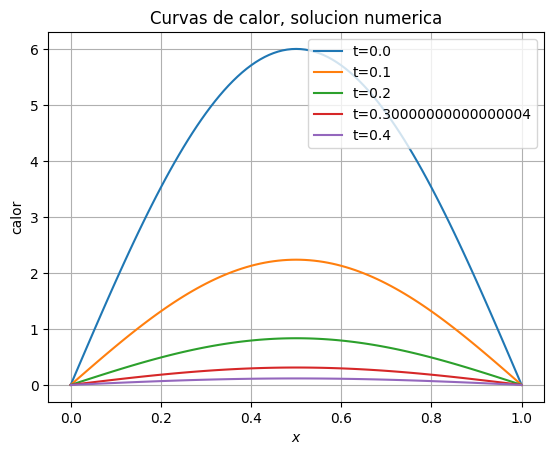

In [8]:
# redefinamos el muestreo en tiempo
dt=0.00001
nt=40001
w = solu_eq_calor(alpha, a, b, t0, nt, nx, dt, f)

# graficamos
params = {'legend.fontsize':5, 'legend.handlength':1}
plt.xlabel(r"$x$")
plt.ylabel("calor")
plt.title("Curvas de calor, solucion numerica")

t0= 0
X = np.linspace(a,b,w.shape[0])
t = np.linspace(t0,t0+nt*dt,w.shape[1])
nsam=10000 # brinco en tiempo para no generar muchas graficas

for j in range(0, nt, nsam):
    t = j*dt + t0
    plt.plot(X, w[:,j], label='t='+str(t))
    plt.legend(labelspacing=1, title='tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Grafica del error

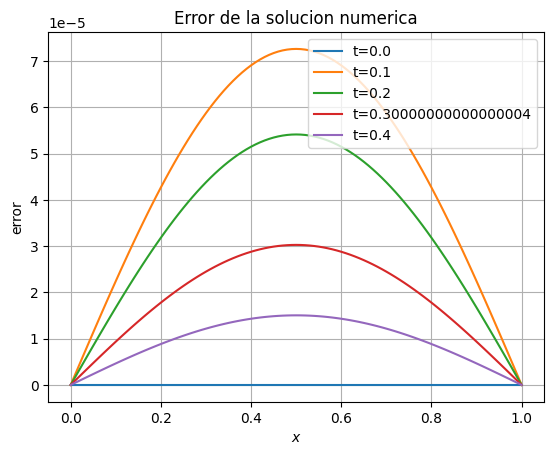

In [10]:
nt=40001
dt=0.00001
dec=10000 # brinco en numero de muestras
dx = (b-a)/(nx-1)
Nt = int(nt/dec) + 1

x0 = 0
# inicializamos el error en 0
error = np.zeros((nx, Nt))

# calculo del error para las 5 graficas
k=0
for j in range(0, nt, dec):
    t = j*dt + t0
    for i in range(nx):
        x = i*dx + x0
        error[i,k] = w[i,j] - u(x,t)
    k +=1

# figura
params={'legend.fontsize':5, 'legend.handlength':1}
plt.xlabel(r"$x$")
plt.ylabel("error")
plt.title(  "Error de la solucion numerica")
X = np.linspace(0, L, w.shape[0])
Dt=0.1
for j in range(Nt):
    t = j*Dt
    plt.plot(X, error[:,j], label='t='+str(t))
    plt.legend(labelspacing=1, title='tiempo')
plt.legend()
plt.grid(True)
plt.show()

## Que pasa si violamos las condiciones de estabilidad.

In [11]:
def solu_eq_calor(alpha, a, b, t0, nt, nx, dt, f):
    '''
    Calcula la solucion numerica de la ecuacion de calor
    alpha: constante de propagacion de calor
    a : bordo izquierdo
    b : bordo derecho
    t0: tiempo inicial
    nt: numero de muestras en tiempo
    nx : numero de muestras en espacio
    dt : paso de tiempo
    f : funcion de frontera
    '''

    L=b-a
    dx = L/(nx-1)
    gamma = alpha*dt/(dx**2)
    stab_cond = dx**2/(2* alpha)

    # verificar estabilidad
    if dt >= stab_cond:
        print("error: la condicion de estabilidad fue violada")
        print(f" dt={dt}")
        print(f" debe ser menor que dx**2/(2*alpha) = {stab_cond} ")
        print(f" gamma debe ser menor que 1/2 y es {gamma}")
    #   return

    # inicializacion con ceros
    w = np.zeros((nx,nt))
    tmax = nt*dt + t0
    t = np.arange(t0, tmax, dt)
    X = np.linspace(a,b,w.shape[0])
    dx = L/(nx-1)

    # condicione inicial
    for i in range(nx):
        w[i,0] = f(X[i])

    # condiciones de frontera
    for j in range(nt):
        w[0,j] = 0
        w[nx-1,j] = 0

    # calculamos la propagacion en tiempo
    for j in range(nt-1):
        # ciclo sobre espacio
        for i in range(1,nx-1):
            w[i, j+1] = (1 - 2 *gamma)*w[i, j] + gamma*(w[i+1, j] + w[i-1, j])

    return w


error: la condicion de estabilidad fue violada
 dt=0.0015
 debe ser menor que dx**2/(2*alpha) = 5e-05 
 gamma debe ser menor que 1/2 y es 15.0


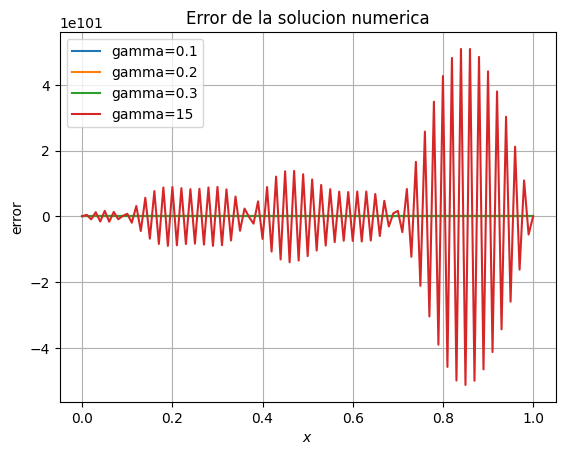

In [18]:
# comentamos la linea de estabilidad  para que no "return"
# definir la funcion getdt
def getdt(gamma, dx, alpha):
    return gamma*dx**2/alpha

# definir ploterror
def ploterror(gammaarray, alpha, L, nx):
    params={'legend.fontsize':5, 'legend.handlength':1}
    plt.xlabel(r"$x$")
    plt.ylabel("error")
    plt.title(  "Error de la solucion numerica")
    dx = L/(nx-1)
    tmax=0.1

    for i in range(len(gammaarray)):
        gamma = gammaarray[i]
        dt = getdt(gamma, dx, alpha)
        nt = int(tmax/dt) + 1
        w = solu_eq_calor(alpha, a, b, t0, nt, nx, dt, f)
        X = np.linspace(a,b,w.shape[0])
        plt.plot(X, w[:, nt-1], label='gamma='+str(gamma))
        plt.legend(labelspacing=1, title='gamma')
    plt.legend()
    plt.grid(True)
    plt.show()
    return

# prueba
alpha=1
a=0
b=1
t0=0
nx=101
L=b-a
# gammaarray=[0.2, 0.5, 1.5, 15]
gammaarray=[0.1, 0.2, 0.3, 15]
ploterror(gammaarray, alpha, L, nx)

## Condiciones de frontera Neumann.
Este Neumann no es John Von Neumann (Hungaro). Este es el Aleman
Carl Neumann. El problema es que las condiciones de frontera son con la derivada (primera) y no con la funcion (Dirichlet).

$$
\begin{cases}
\frac{\partial u}{\partial t} - \alpha \frac{\partial^2 u}{\partial x^2} = 0 \\
u(x, t_0=c) = I_0(x) \quad , \quad \text{condicion inicial} \\
\frac{\partial}{\partial x} u(a,t) = h_1 (t) \quad , \quad
\frac{\partial}{\partial x} u(b,t) = h_2 (t) \quad , \quad
\text{condiciones de frontera Neumann}
\end{cases}
$$

La pregunta es como queda el sistema de ecuaionces en diferencias finitas.

$$w_{i j+1} = (1 - 2 \gamma) w_{ij} + \gamma( w_{i+1 j} - w_{i-1 j}) \tag{4} $$
El problema es que pasa con $i=1$? o $i=nx-1=n-1$

Vamos por partes

* $i=1$:
Evaluamos la derivada (central) en $i=1$

$$\frac{w_{2j} - w_{0j}}{2 \Delta x} = h_1(j \Delta t) + \mathcal{O})(\Delta x^2)  $$

Despejamos de aca el valor $w_{0j}$

$$2 h_1(j \Delta x) \approx w_{2j} - w_{0j} $$

de donde

$$w_{0j} = w_{2j} - 2 h_1(j \Delta t) \Delta x $$

Entonces la expression (4) queda


$$w_{1 j+1} = (1 - 2 \gamma) w_{1j} + \gamma( w_{2 j} - w_{0 j})
= (1 - 2 \gamma) w_{1j} + \gamma w_{2j} - \gamma [ w_{2j} - 2 h_1(j \Delta t) \Delta x]  $$

* $i=nx-1=n-1$.
Evaluamos la derivada en central $n-1$.

$$\frac{w_{nj} - w_{n-2 j} }{2 \Delta x} = h_2(j \Delta t) + \mathcal{O}(\Delta x^2) $$

Depejamos $w_{nj}$

$$w_{nj} - w_{n-2 j} = 2 \Delta x h_2(j \Delta t) $$

es decir

$$w_{nj} = w_{n-2 j} + 2 \Delta x h_2(j \Delta t) $$

Evaluamos (4) PARA $i=n-1$.

$$w_{n-1 j+1} = (1 - 2 \gamma) w_{n-1 j} + \gamma( w_{n j} - w_{n-2 j}) = (1 - 2 \gamma) w_{n-1 j} + \gamma w_{nj} - \gamma w_{n-2 j} = (1 - 2 \gamma) w_{n-1 j} + \gamma (w_{n-2 j} + 2 \Delta x h_2(j \Delta t)) - \gamma w_{n-2 j} $$

Es decir

$$w_{n-1 j+1}= \gamma w_{n-2 j} + (1 - 2 \gamma) w_{n-1 j} + \gamma [ w_{n-2 j} + 2 \Delta x h(2(j \Delta t)] $$